<a href="https://colab.research.google.com/github/vitor-edu/Programa-de-Formacao-Big-Data-BRQ/blob/main/Projeto2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas

import pandas as pd # Manipulação de dados
from sklearn import tree # Arvore de decisão
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics
import graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_buyers_clean.csv to bike_buyers_clean.csv


In [ ]:
dados2 = pd.read_csv('bike_buyers_clean.csv')

In [ ]:
dados2.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
dados2.shape

(1000, 13)

In [ ]:
dados2.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [ ]:
dados2.describe

<bound method NDFrame.describe of         ID Marital Status  Gender  ...         Region  Age Purchased Bike
0    12496        Married  Female  ...         Europe   42             No
1    24107        Married    Male  ...         Europe   43             No
2    14177        Married    Male  ...         Europe   60             No
3    24381         Single    Male  ...        Pacific   41            Yes
4    25597         Single    Male  ...         Europe   36            Yes
..     ...            ...     ...  ...            ...  ...            ...
995  23731        Married    Male  ...  North America   54            Yes
996  28672         Single    Male  ...  North America   35            Yes
997  11809        Married    Male  ...  North America   38            Yes
998  19664         Single    Male  ...  North America   38             No
999  12121         Single    Male  ...  North America   53            Yes

[1000 rows x 13 columns]>

In [ ]:
dados2.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
dados2['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [ ]:
dados2['Occupation'].unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

In [ ]:
dados2['Commute Distance'].unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles'],
      dtype=object)

In [ ]:
dados2['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [ ]:
dados2['Gender'] = dados2['Gender'].replace('Male', 0)
dados2['Gender'] = dados2['Gender'].replace('Female', 1)
dados2['Marital Status'] = dados2['Marital Status'].replace('Married', 1)
dados2['Marital Status'] = dados2['Marital Status'].replace('Single', 0)
dados2['Commute Distance'] = dados2['Commute Distance'].replace('0-1 Miles', 1)
dados2['Commute Distance'] = dados2['Commute Distance'].replace('2-5 Miles', 5)
dados2['Commute Distance'] = dados2['Commute Distance'].replace('5-10 Miles', 10)
dados2['Commute Distance'] = dados2['Commute Distance'].replace('1-2 Miles', 2)
dados2['Commute Distance'] = dados2['Commute Distance'].replace('10+ Miles', 11)
dados2['Education'] = dados2['Education'].replace('Bachelors', 1)
dados2['Education'] = dados2['Education'].replace('Partial College', 2)
dados2['Education'] = dados2['Education'].replace('High School', 3)
dados2['Education'] = dados2['Education'].replace('Partial High School', 4)
dados2['Education'] = dados2['Education'].replace('Graduate Degree', 5)
dados2['Occupation'] = dados2['Occupation'].replace('Skilled Manual', 1)
dados2['Occupation'] = dados2['Occupation'].replace('Clerical', 2)
dados2['Occupation'] = dados2['Occupation'].replace('Professional', 3)
dados2['Occupation'] = dados2['Occupation'].replace('Manual', 4)
dados2['Occupation'] = dados2['Occupation'].replace('Management', 5)
dados2['Region'] = dados2['Region'].replace('Europe', 1)
dados2['Region'] = dados2['Region'].replace('North America', 2)
dados2['Region'] = dados2['Region'].replace('Pacific', 3)
dados2['Home Owner']= dados2['Home Owner'].replace('Yes', 0)
dados2['Home Owner']= dados2['Home Owner'].replace('No', 1)

In [ ]:
dados2.drop('ID', axis = 1, inplace=True)

In [ ]:
dados2.dtypes

Marital Status       int64
Gender               int64
Income               int64
Children             int64
Education            int64
Occupation           int64
Home Owner           int64
Cars                 int64
Commute Distance     int64
Region               int64
Age                  int64
Purchased Bike      object
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados2.drop('Purchased Bike', axis = 1),dados2['Purchased Bike'],test_size=0.25, random_state = 50)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
print('\nMatriz de confusão detalhada:\n',
      pd.crosstab(y_test, predictions, rownames = ['Real'], 
                  colnames = ['Predito'], margins = True,
                  margins_name = 'Todos'))



Matriz de confusão detalhada:
 Predito   No  Yes  Todos
Real                    
No        85   45    130
Yes       52   68    120
Todos    137  113    250


In [ ]:
print('Relatório sobre a qualidade:\n')
print(metrics.classification_report(y_test, predictions, target_names = ['Yes', 'No']))

Relatório sobre a qualidade:

              precision    recall  f1-score   support

         Yes       0.62      0.65      0.64       130
          No       0.60      0.57      0.58       120

    accuracy                           0.61       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.61      0.61      0.61       250



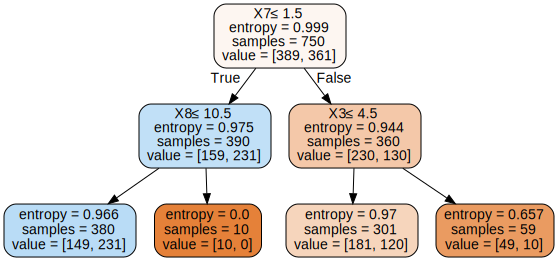

In [ ]:
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("bike")
dot_data = tree.export_graphviz(clf, out_file = None,
                                #feature_names = dados2.feature_names, 
                                #class_names = dados2.target_names, 
                                filled = True, rounded = True, 
                               special_characters =True
                                )

graph =graphviz.Source(dot_data, format = 'png')
graph